# Feature Selection techniques 

Filter:

# 1:Correlation and variance thershold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston
data=load_boston()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

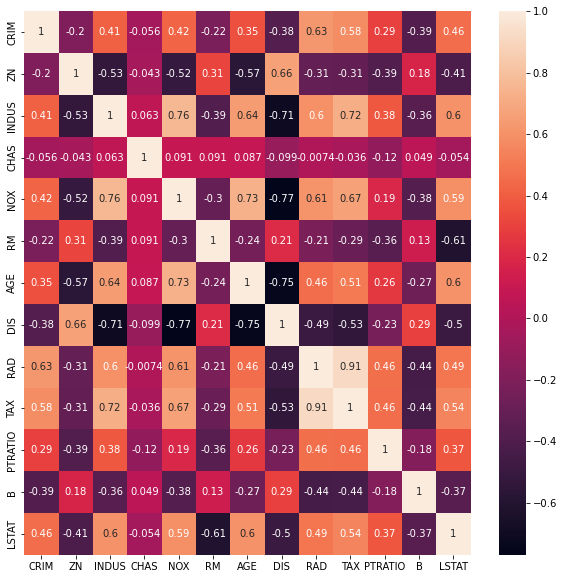

In [3]:
corrmat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True,)

Here RAD and TAX have highest values that to (similar values ) so we can remove the features .

In [4]:
from sklearn.feature_selection import VarianceThreshold
df["Mynewcol"]=100

varthresh=VarianceThreshold(threshold=0)
varthresh.fit(df)
varthresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

The False indicates that the feature we can remove 

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Mynewcol
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,100
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,100
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,100
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,100
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,100


# 2:Chi Square-Anova F-value:

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2,f_classif


In [7]:
iris=load_iris()
x=iris.data
y=iris.target
x=x.astype(int)
chi2_selector=SelectPercentile(chi2)
kbest=chi2_selector.fit_transform(x,y)



In [8]:
chi2_score=pd.DataFrame(list(zip(iris.feature_names,chi2_selector.scores_)),columns=['feature','score'])
chi2_score

,feature,score
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


In [9]:
print("Original features :",x.shape[1])
print("Reduced features:",kbest.shape[1])

Original features : 4
Reduced features: 1


# 3:Information gain:

In [10]:
from sklearn.feature_selection import mutual_info_classif
df=pd.read_csv("C:\\Users\\vamsi\\Downloads\\insurance.csv")

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
features=df[['age','bmi','charges']]
target=df[['region']]
feature_score=mutual_info_classif(features,target,random_state=0)
feature_score

array([0.00055504, 0.18958508, 0.07632417])

which have a highest value that is the important value, so here bmi have highest value  